# 1、生成数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

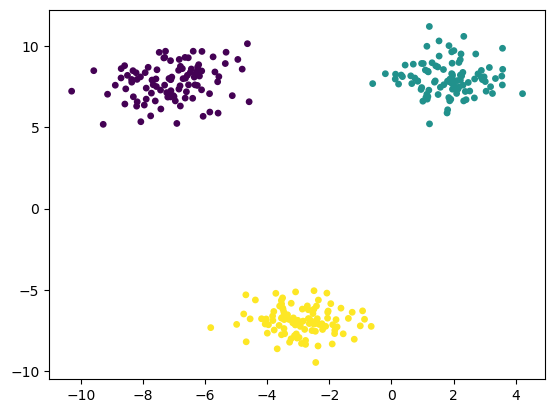

In [2]:
x, y = make_blobs(
    n_samples=300,
    n_features=2,
    centers=3,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    random_state=233,
    return_centers=False
)

plt.scatter(x[:, 0], x[:, 1], c=y, s=15)
plt.show()

# 2、划分数据集

## 2.1 生成序列值

In [3]:
# 生成序列
index = np.arange(20)
print(index)

# 打乱顺序
np.random.shuffle(index)
print(index)

print(np.random.permutation(20))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[13  1  8 10  4  7 16  5 19  6 12  3 17 11  9 15  0  2 14 18]
[ 4 16  0 13  1 10 18  5 19  7 14  3  9  6  8 11 15 12 17  2]


## 2.2 设置种子值

In [4]:
np.random.seed(233)
shuffle_index = np.random.permutation(len(x))
print(shuffle_index)
print(shuffle_index.shape)

[ 23  86 204 287 206 170 234  94 146 180 263  22   3 264 194 290 229 177
 208 202  10 188 262 120 148 121  98 160 267 136 294   2  34 142 271 133
 127  12  29  49 112 218  36  57  45  11  25 151 212 289 157  19 275 176
 144  82 161  77  51 152 135  16  65 189 298 279  37 187  44 210 178 165
   6 162  66  32 198  43 108 211  67 119 284  90  89  56 217 158 228 248
 191  47 296 123 181 200  40  87 232  97 113 122 220 153 173  68  99  61
 273 269 281 209   4 110 259  95 205 288   8 283 231 291 171 111 242 216
 285  54 100  38 185 235 174 201 107 223 222 196 268 114 147 166  85  39
  58 256 258  74 251  15 150 137  70  91  52  14 169  21 184 207 238 128
 219 125 293 134  27 265  96 270  18 109 126 203  88 249  92 213  60 227
   5  59   9 138 236 280 124 199 225 149 145 246 192 102  48  73  20  31
  63 237  78  62 233 118 277  28  50  64 117 197 140   7 105 252  71 190
  76 103  93 183  72   0 278  79 172 214 182 292 139 260  30 195  13 244
 240 297 257 245 143 186 243 266 286 168 179  81 21

## 2.3 划分数据集

In [5]:
train_size = 0.7
train_index = shuffle_index[:int(len(x) * train_size)]
test_index = shuffle_index[int(len(x) * train_size):]
print(train_index.shape)
print(test_index.shape)

(210,)
(90,)


## 2.4 封装函数

In [6]:
def train_test_spllit(x, y, train_size=0.7, rann_seed=None):
    if rann_seed:
        np.random.seed(rann_seed)
    shuffle_index = np.random.permutation(len(x))
    train_index = shuffle_index[:int(len(x) * train_size)]
    test_index = shuffle_index[int(len(x) * train_size):]
    return x[train_index], y[train_index], x[test_index], y[test_index]

In [7]:
x_train, y_train, x_test, y_test = train_test_spllit(x, y, train_size=0.7, rann_seed=233)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(210, 2)
(210,)
(90, 2)
(90,)


## 2.5 可视化结果

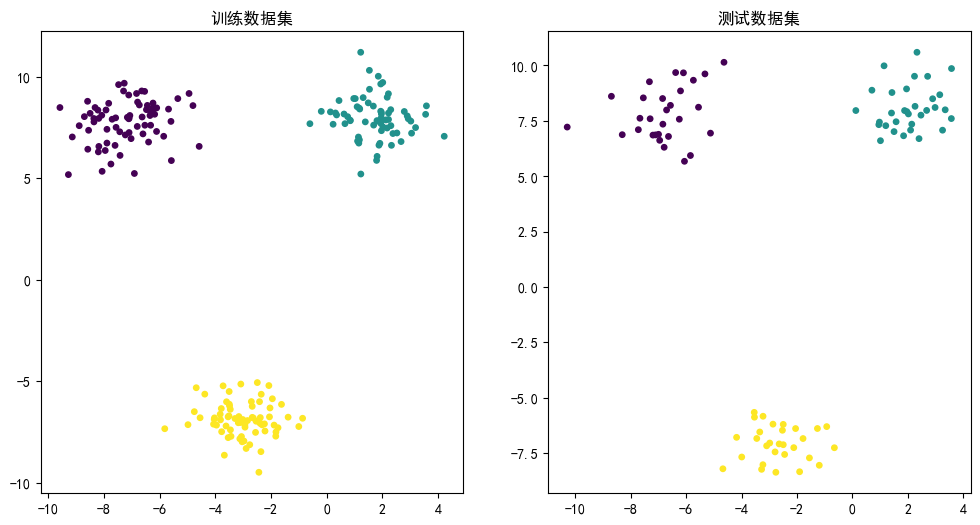

In [8]:
plt.rcParams['font.sans-serif']=['SimHei'] # 使用黑体显示中文
plt.rcParams['axes.unicode_minus']=False # 解决负号'-'显示为方块的问题

# 创建一个包含两个子图的图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制训练数据集的散点图
ax1.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=15)
ax1.set_title('训练数据集')

# 绘制测试数据集的散点图
ax2.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=15)
ax2.set_title('测试数据集')

# 显示图形
plt.show()